# Gaussian Likelihood and $\chi^{2}$

In [11]:
#import main libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

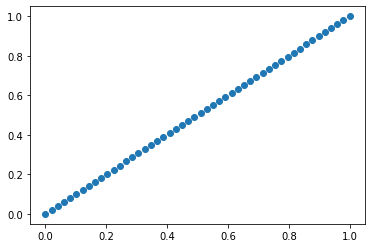

In [113]:
#Making a set of data and time
y = np.linspace(0,1,50)
t = np.linspace(0,1,50)

plt.plot(t,y, 'o')

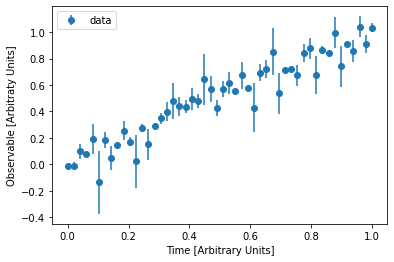

In [133]:
#Adding withe noise to data set
noise = np.random.normal(0, 0.1,50)
signal = y + noise

#Creating a line function
def line(t,p):
    a = p[0]
    b = p[1]
    return a + b*t

#Plotting with error bars
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.xlabel("Time [Arbitrary Units]")
plt.ylabel("Observable [Arbitraty Units]")
plt.legend()
plt.show()

# Gaussian Likelihood


$ L = P(D|M) = \left[ \prod_{i = 1}^{n} \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right]exp\left[ -\sum_{i =1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right] $

## Taking the natural log to the Gaussian Likelihood:


$ \ln(L) = \sum_{i = 1}^{n}  \ln \left[ \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right] - \sum_{i = 1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} $

$ ln(L) = \sum_{i=1}^{n} \left[ \ln \left( \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right) - \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right]$

## Then:

$ln(L) = \sum_{i=1}^{n}\left[ -\frac{1}{2} \ln\left( 2 \pi \sigma_{i}^{2} \right) - \frac{1}{2}\frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right]$

## Then:

$ln(L) = -\frac{1}{2}\sum_{i=1}^{n} \left[ \ln \left( 2 \pi \sigma_{i}^{2} \right) + \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right]$

In [121]:
#Defining a function for the logarithmic Gaussian likelihood
def negalolik(p,t,y,noise):
    f = line(t,p)
    chidos = (y - f)**2/noise**2
    lognorm = np.log(2 * np.pi * noise**2)
    total = lognorm + chidos
    loglike = -0.5*np.sum(total)
#Since we are trying to maximize the gaussian likelihood, we have to minimize its negative.     
    return -loglike


In [122]:
#Maximizing the likelihood.
lik_model = minimize(negalolik,x0=[0,0], args=(t,y,noise))

In [123]:
lik_model

      fun: -95.9529367351496
 hess_inv: array([[ 6.94195224e-05, -1.51493448e-04],
       [-1.51493448e-04,  3.34463762e-04]])
      jac: array([9.53674316e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([-3.53019313e-07,  1.00000076e+00])

In [124]:
print("The optimized values of our parameters are:","a =", lik_model.x[0],"and b =",lik_model.x[1])

The optimized values of our parameters are: a = -3.530193125482581e-07 and b = 1.0000007629382461


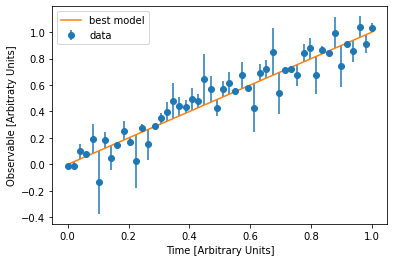

In [135]:
#Now plotting with those parameters
f = line(t,lik_model.x)
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t,f, label = "best model")
plt.xlabel("Time [Arbitrary Units]")
plt.ylabel("Observable [Arbitraty Units]")
plt.legend()
plt.show()

# Now with $\chi^{2}$

## The mathematical expression for $\chi^{2}$ can be written as follows :

$ \chi_{2} = \sum_{i = 1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}}$

## Above's expression is very similar to the one of the Gaussian likelihood without the normalization term. This is because we can transform a Gaussian likelihood function into a $\chi_{2}$ if and only if the normalization term is constant.

In [126]:
#Defining a new line function
def linea(t,para):
    c = para[0]
    d = para[1]
    return c + d*t

#Defining a chi_square function
def jicuadro(para,t,y,noise):
    m = linea(t,para)
    chi = 0.5*(y - m)**2/noise**2
    chi_square = np.sum(chi)
    return chi_square


In [127]:
#Minimizing the chi_square
ji_cuadro = minimize(jicuadro,x0=[0,0],args=(t,y,noise))

In [128]:
print(ji_cuadro)

      fun: 9.049514728472632e-10
 hess_inv: array([[ 6.94195227e-05, -1.51493448e-04],
       [-1.51493448e-04,  3.34463763e-04]])
      jac: array([-6.41536546e-11, -4.75101278e-11])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([-3.53050427e-07,  1.00000076e+00])


In [129]:
print("The optimized values of our parameters are:","c =", ji_cuadro.x[0],"and d =",ji_cuadro.x[1])

The optimized values of our parameters are: c = -3.530504273854597e-07 and d = 1.000000763007421


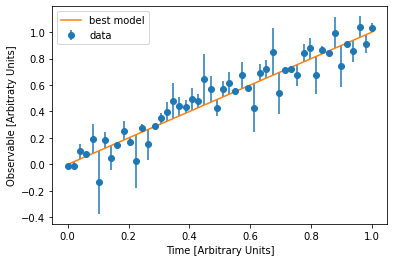

In [134]:
#Now plotting with those parameters
f = line(t,ji_cuadro.x)
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t,f, label = "best model")
plt.xlabel("Time [Arbitrary Units]")
plt.ylabel("Observable [Arbitraty Units]")
plt.legend()
plt.show()